In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import time
from sklearn.metrics import roc_curve, auc

In [2]:
df=pd.read_csv("Electric_Vehicle_Population_Data.csv")
print(df.shape)
print(df.head())
df.describe()

(223995, 17)
   VIN (1-10)     County          City State  Postal Code  Model Year  \
0  1C4JJXP66P     Kitsap       Poulsbo    WA      98370.0        2023   
1  1G1FX6S08K  Snohomish  Lake Stevens    WA      98258.0        2019   
2  WBY1Z2C58F       King       Seattle    WA      98116.0        2015   
3  5YJ3E1EBXK       King       Seattle    WA      98178.0        2019   
4  5YJSA1V24F     Yakima         Selah    WA      98942.0        2015   

        Make     Model                   Electric Vehicle Type  \
0       JEEP  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
1  CHEVROLET   BOLT EV          Battery Electric Vehicle (BEV)   
2        BMW        I3          Battery Electric Vehicle (BEV)   
3      TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
4      TESLA   MODEL S          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range            21.0   
1        

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,223992.000000,223995.000000,223977.000000,223977.000000,223521.000000,2.239950e+05,2.239920e+05
mean,98176.491165,2021.264408,47.736187,829.894386,28.876361,2.329328e+08,5.297997e+10
std,2544.240509,2.989676,84.987140,7372.509049,14.911023,6.884329e+07,1.531491e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.008002e+08,5.303301e+10
50%,98126.000000,2022.000000,0.000000,0.000000,32.000000,2.482992e+08,5.303303e+10
75%,98374.000000,2023.000000,39.000000,0.000000,42.000000,2.673973e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [3]:
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        18
Base MSRP                                             18
Legislative District                                 474
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [4]:
df=df.dropna()
print(df.shape)

(223496, 17)


In [5]:
df = df[df["Base MSRP"] != 0]

In [6]:
print(df.shape)
print(df.head)

(3247, 17)
<bound method NDFrame.head of         VIN (1-10)        County           City State  Postal Code  \
6       WBAJB1C58K      Thurston          Lacey    WA      98503.0   
16      5YJSA1H18E        Kitsap        Poulsbo    WA      98370.0   
24      WBA8E1C59J        Kitsap        Poulsbo    WA      98370.0   
51      5YJSA1DP8D     Snohomish       Stanwood    WA      98292.0   
88      KNDJP3AE2G      Thurston        Olympia    WA      98501.0   
...            ...           ...            ...   ...          ...   
223727  5YJSA1H18E     Snohomish         Sultan    WA      98294.0   
223792  2C4RC1L75K          King        Redmond    WA      98052.0   
223934  5YJSA1CN1D         Clark      Vancouver    WA      98682.0   
223972  KNDJX3AE1G  Grays Harbor  Pacific Beach    WA      98571.0   
223982  2C4RC1N73K          King        Redmond    WA      98052.0   

        Model Year      Make     Model  \
6             2019       BMW      530E   
16            2014     TESLA   MOD

In [7]:
df = df.drop(columns=["VIN (1-10)", "State", "Postal Code","DOL Vehicle ID","Vehicle Location", "2020 Census Tract"])
print(df.shape)
print(df.head())

(3247, 11)
       County      City  Model Year   Make    Model  \
6    Thurston     Lacey        2019    BMW     530E   
16     Kitsap   Poulsbo        2014  TESLA  MODEL S   
24     Kitsap   Poulsbo        2018    BMW     330E   
51  Snohomish  Stanwood        2013  TESLA  MODEL S   
88   Thurston   Olympia        2016    KIA     SOUL   

                     Electric Vehicle Type  \
6   Plug-in Hybrid Electric Vehicle (PHEV)   
16          Battery Electric Vehicle (BEV)   
24  Plug-in Hybrid Electric Vehicle (PHEV)   
51          Battery Electric Vehicle (BEV)   
88          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
6              Not eligible due to low battery range            15.0   
16           Clean Alternative Fuel Vehicle Eligible           208.0   
24             Not eligible due to low battery range            14.0   
51           Clean Alternative Fuel Vehicle Eligible           208.0   
88           Clean Al

In [8]:
string_columns = ['County', 'City', 'Make', 'Model', 'Electric Utility']
df[string_columns] = df[string_columns].apply(lambda x: x.str.title())
print(df.head())

       County      City  Model Year   Make    Model  \
6    Thurston     Lacey        2019    Bmw     530E   
16     Kitsap   Poulsbo        2014  Tesla  Model S   
24     Kitsap   Poulsbo        2018    Bmw     330E   
51  Snohomish  Stanwood        2013  Tesla  Model S   
88   Thurston   Olympia        2016    Kia     Soul   

                     Electric Vehicle Type  \
6   Plug-in Hybrid Electric Vehicle (PHEV)   
16          Battery Electric Vehicle (BEV)   
24  Plug-in Hybrid Electric Vehicle (PHEV)   
51          Battery Electric Vehicle (BEV)   
88          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
6              Not eligible due to low battery range            15.0   
16           Clean Alternative Fuel Vehicle Eligible           208.0   
24             Not eligible due to low battery range            14.0   
51           Clean Alternative Fuel Vehicle Eligible           208.0   
88           Clean Alternative F

/var/folders/c1/1s6rg9v95b5_yr464y1gxkfh0000gn/T/ipykernel_1929/2304805353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Electric Vehicle Type', order=df['Electric Vehicle Type'].value_counts().index, palette='coolwarm')


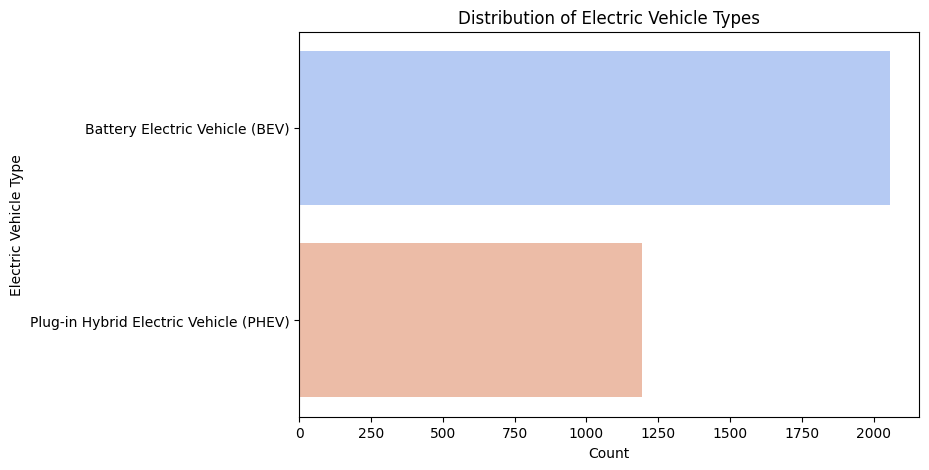

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Electric Vehicle Type', order=df['Electric Vehicle Type'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Count')
plt.ylabel('Electric Vehicle Type')
plt.show()


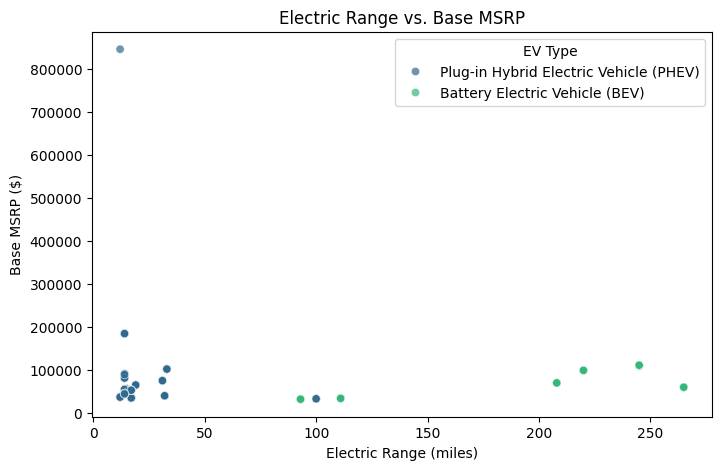

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Electric Range', y='Base MSRP', hue='Electric Vehicle Type', palette='viridis', alpha=0.7)
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.legend(title='EV Type')
plt.show()

/var/folders/c1/1s6rg9v95b5_yr464y1gxkfh0000gn/T/ipykernel_1929/4253655330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties.index, y=top_counties.values, palette='magma')


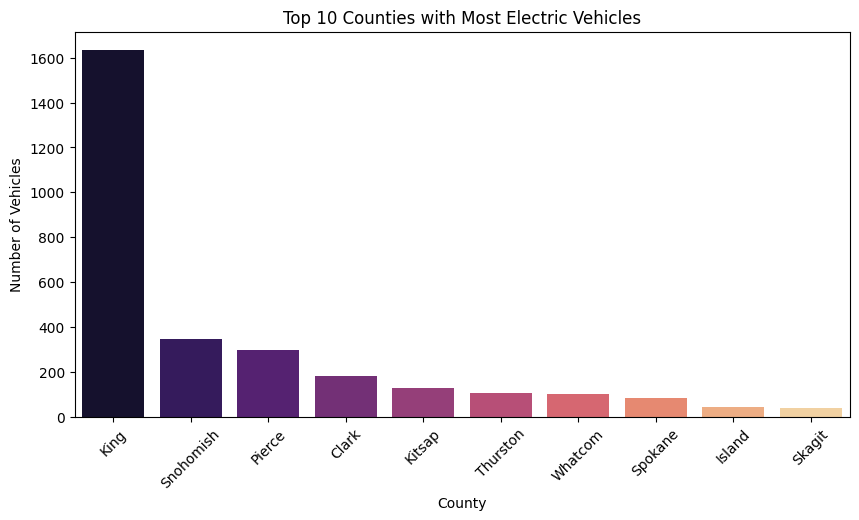

In [11]:
plt.figure(figsize=(10, 5))
top_counties = df['County'].value_counts().head(10)
sns.barplot(x=top_counties.index, y=top_counties.values, palette='magma')
plt.xticks(rotation=45)
plt.title('Top 10 Counties with Most Electric Vehicles')
plt.xlabel('County')
plt.ylabel('Number of Vehicles')
plt.show()

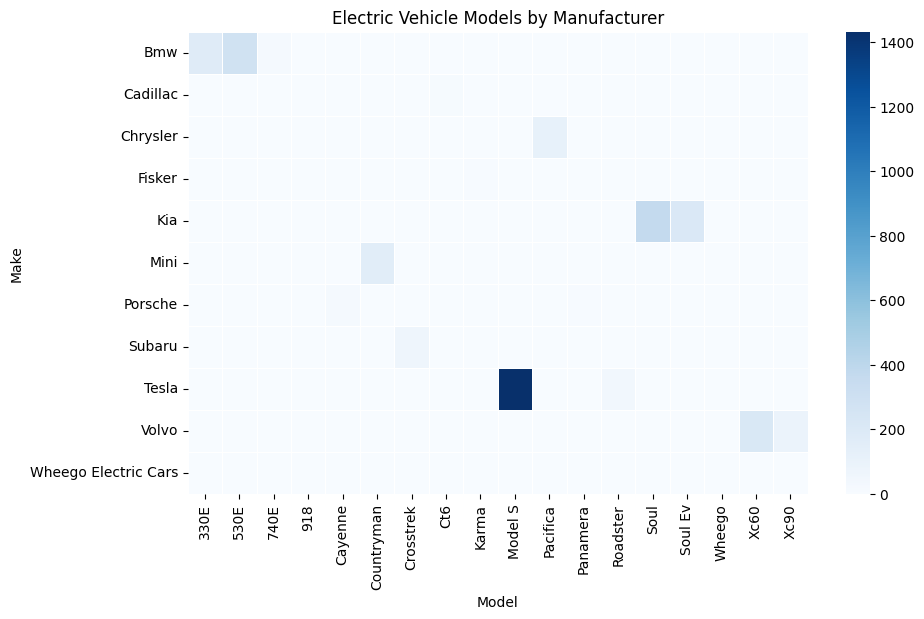

In [12]:
plt.figure(figsize=(10, 6))
manufacturer_model_counts = df.groupby(['Make', 'Model']).size().unstack(fill_value=0)
sns.heatmap(manufacturer_model_counts, cmap='Blues', linewidths=0.5)
plt.title('Electric Vehicle Models by Manufacturer')
plt.xlabel('Model')
plt.ylabel('Make')
plt.show()

In [13]:
string_columns = df.select_dtypes(include=['object'])

unique_counts = string_columns.nunique()
print(unique_counts)

County                                                35
City                                                 232
Make                                                  11
Model                                                 18
Electric Vehicle Type                                  2
Clean Alternative Fuel Vehicle (CAFV) Eligibility      2
Electric Utility                                      52
dtype: int64


In [14]:
columns_to_encode = ['County', 'City', 'Make', 'Model', 'Electric Utility','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility']
for col in columns_to_encode:
    df[col] = df[col].astype('category').cat.codes
print(df.head())

    County  City  Model Year  Make  Model  Electric Vehicle Type  \
6       29    97        2019     0      1                      1   
16      14   158        2014     8      9                      0   
24      14   158        2018     0      0                      1   
51      26   193        2013     8      9                      0   
88      29   141        2016     4     13                      0   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
6                                                   1            15.0   
16                                                  0           208.0   
24                                                  1            14.0   
51                                                  0           208.0   
88                                                  0            93.0   

    Base MSRP  Legislative District  Electric Utility  
6     55700.0                  22.0                49  
16    69900.0                  23.0     

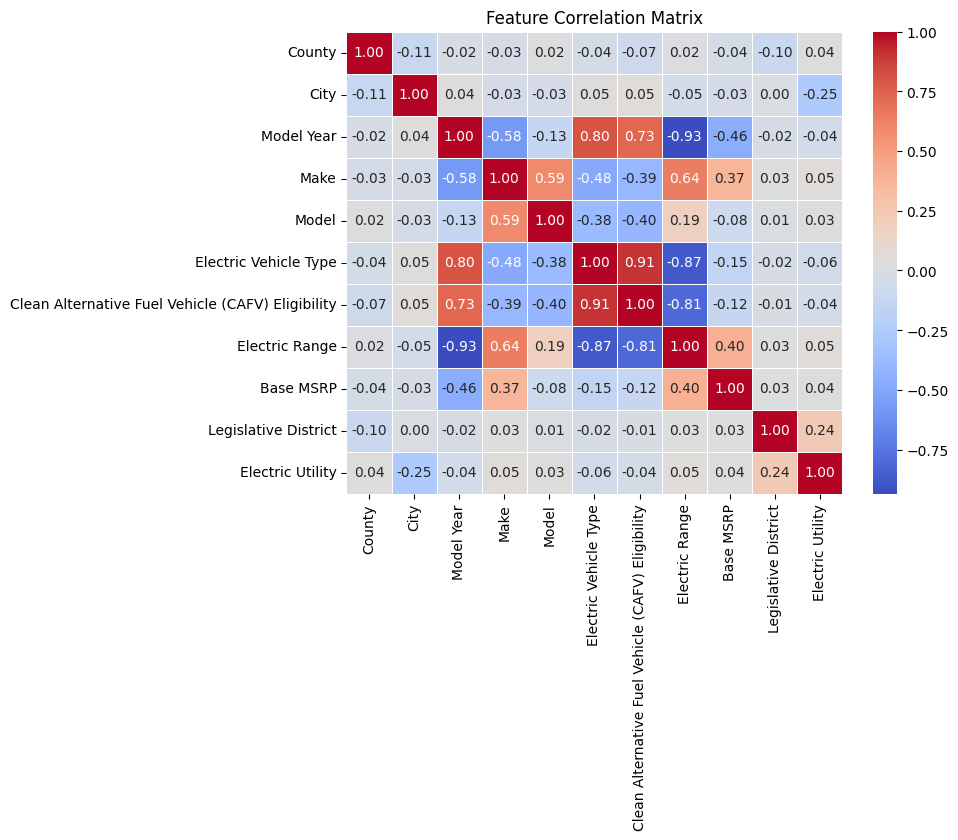

    County  City  Model Year  Make  Model  Electric Vehicle Type  \
6       29    97        2019     0      1                      1   
16      14   158        2014     8      9                      0   
24      14   158        2018     0      0                      1   
51      26   193        2013     8      9                      0   
88      29   141        2016     4     13                      0   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
6                                                   1            15.0   
16                                                  0           208.0   
24                                                  1            14.0   
51                                                  0           208.0   
88                                                  0            93.0   

    Base MSRP  Legislative District  Electric Utility  
6     55700.0                  22.0                49  
16    69900.0                  23.0     

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()
print(df.head())

In [16]:
numeric_columns = [ 'Electric Range', 'Base MSRP']

for col in numeric_columns:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = (df[col] - min_val) / (max_val - min_val)
print(df.head())

    County  City  Model Year  Make  Model  Electric Vehicle Type  \
6       29    97        2019     0      1                      1   
16      14   158        2014     8      9                      0   
24      14   158        2018     0      0                      1   
51      26   193        2013     8      9                      0   
88      29   141        2016     4     13                      0   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
6                                                   1        0.011858   
16                                                  0        0.774704   
24                                                  1        0.007905   
51                                                  0        0.774704   
88                                                  0        0.320158   

    Base MSRP  Legislative District  Electric Utility  
6    0.029211                  22.0                49  
16   0.046676                  23.0     

In [17]:
from sklearn.model_selection import train_test_split

Y = df['Electric Vehicle Type']
X = df.drop('Electric Vehicle Type', axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1875, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2110, 10)
y_train shape: (2110,)
X_val shape: (487, 10)
y_val shape: (487,)
X_test shape: (650, 10)
y_test shape: (650,)


LOGISTIC REGRESSION MODEL

In [18]:
print("Model 1: Logistic Regression")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

lr_val_pred = lr_model.predict(X_val)
lr_test_pred = lr_model.predict(X_test)

lr_val_accuracy = accuracy_score(y_val, lr_val_pred)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)

lr_val_loss = log_loss(y_val, lr_model.predict_proba(X_val))
lr_test_loss = log_loss(y_test, lr_model.predict_proba(X_test))

print(f"Validation Accuracy: {lr_val_accuracy:.4f}")
print(f"Test Accuracy: {lr_test_accuracy:.4f}")
print(f"Validation Loss: {lr_val_loss:.4f}")
print(f"Test Loss: {lr_test_loss:.4f}")


Model 1: Logistic Regression
Validation Accuracy: 0.7556
Test Accuracy: 0.7585
Validation Loss: 0.4125
Test Loss: 0.4321


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


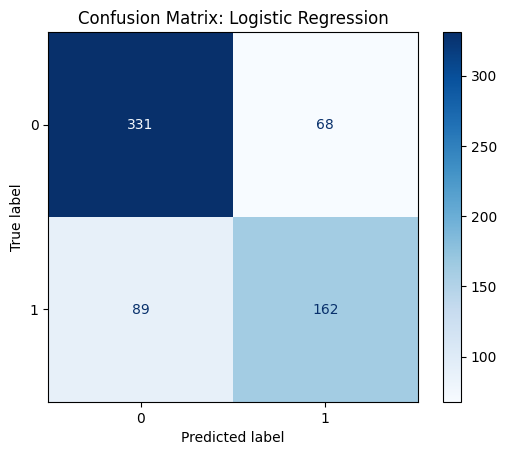

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()


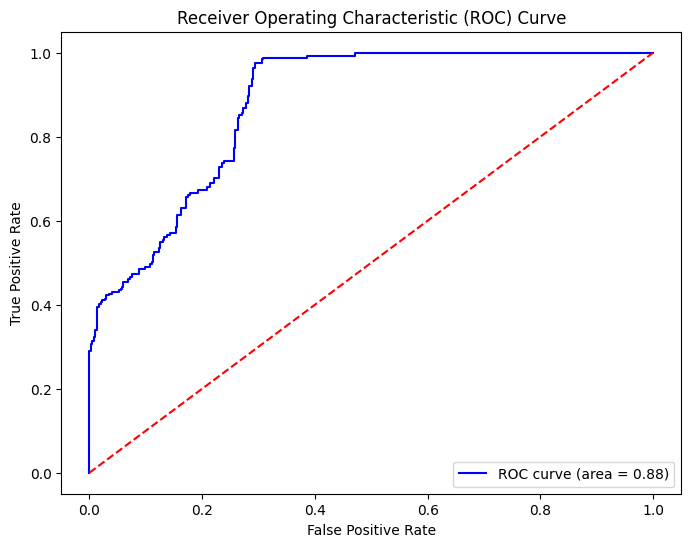

In [20]:
from sklearn.metrics import roc_curve, auc

lr_probs = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

RANDOM FOREST MODEL


Model 2: Random Forest
Validation Accuracy: 0.8891
Test Accuracy: 0.8523
Validation Loss: 0.3188
Test Loss: 0.3759


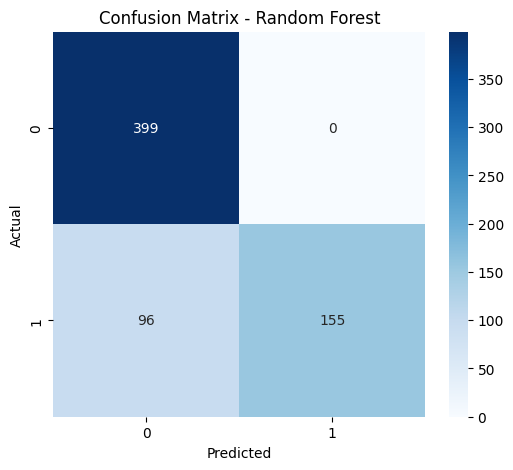


Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       399
           1       1.00      0.62      0.76       251

    accuracy                           0.85       650
   macro avg       0.90      0.81      0.83       650
weighted avg       0.88      0.85      0.84       650



In [22]:
print("\nModel 2: Random Forest")
rf_model = RandomForestClassifier(n_estimators=1, max_depth=1, random_state=42)
rf_model.fit(X_train, y_train)

rf_val_pred = rf_model.predict(X_val)
rf_test_pred = rf_model.predict(X_test)

rf_val_accuracy = accuracy_score(y_val, rf_val_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)

rf_val_loss = log_loss(y_val, rf_model.predict_proba(X_val))
rf_test_loss = log_loss(y_test, rf_model.predict_proba(X_test))

print(f"Validation Accuracy: {rf_val_accuracy:.4f}")
print(f"Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Validation Loss: {rf_val_loss:.4f}")
print(f"Test Loss: {rf_test_loss:.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, rf_test_pred), annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# Classification Report
print("\nClassification Report:\n", classification_report(y_test, rf_test_pred))


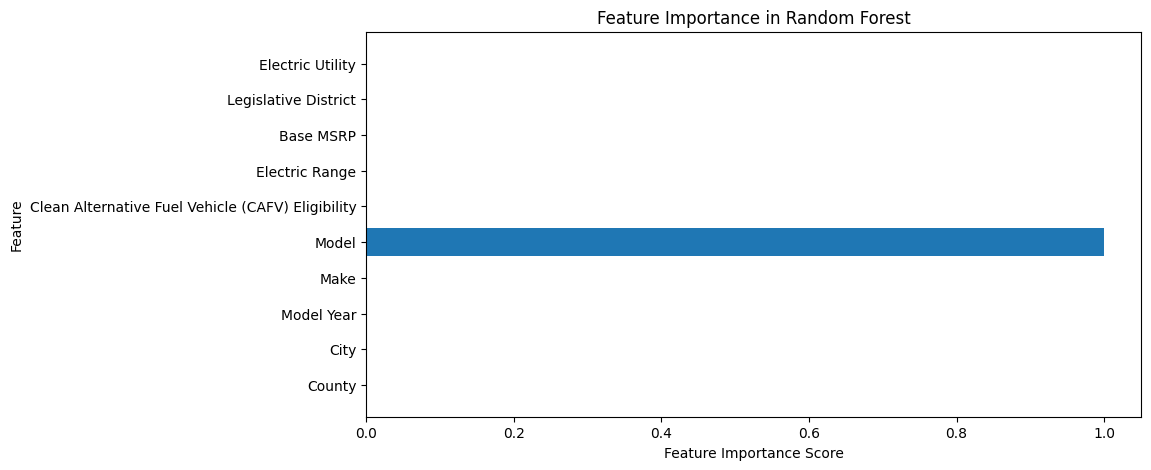

In [23]:
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 5))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

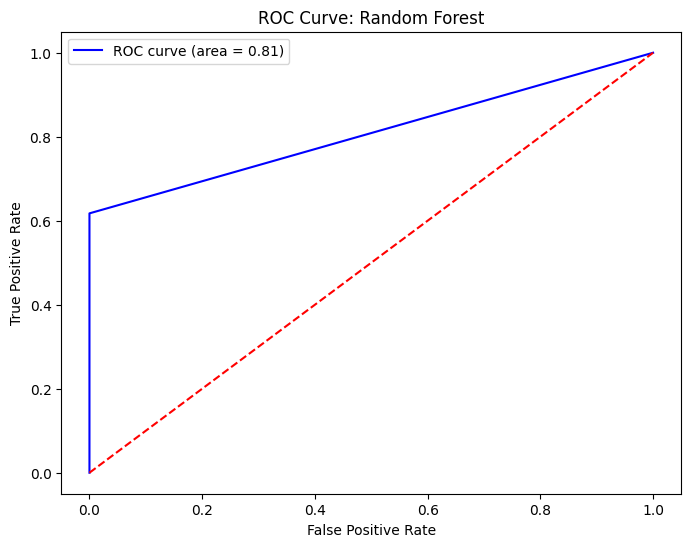

In [24]:
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest')
plt.legend()
plt.show()


KNN MODEL

In [25]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_val_pred = knn_model.predict(X_val)
knn_test_pred = knn_model.predict(X_test)

knn_val_proba = knn_model.predict_proba(X_val)
knn_test_proba = knn_model.predict_proba(X_test)

knn_val_accuracy = accuracy_score(y_val, knn_val_pred)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
knn_val_loss = log_loss(y_val, knn_val_proba)
knn_test_loss = log_loss(y_test, knn_test_proba)

print("\nK-Nearest Neighbors - Validation Accuracy:", knn_val_accuracy)
print("K-Nearest Neighbors - Test Accuracy:", knn_test_accuracy)
print("K-Nearest Neighbors - Validation Loss:", knn_val_loss)
print("K-Nearest Neighbors - Test Loss:", knn_test_loss)


K-Nearest Neighbors - Validation Accuracy: 0.8809034907597536
K-Nearest Neighbors - Test Accuracy: 0.8876923076923077
K-Nearest Neighbors - Validation Loss: 1.2079420168708745
K-Nearest Neighbors - Test Loss: 0.5258266701015188


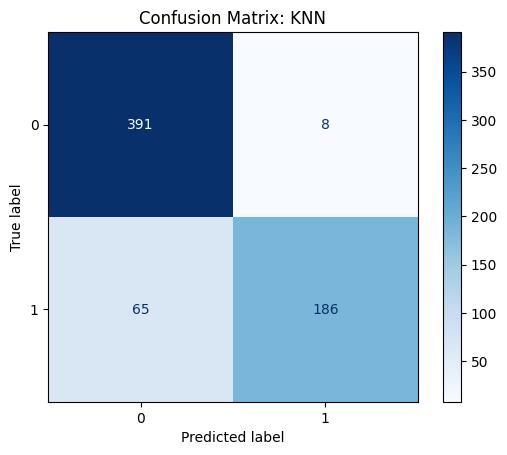

In [26]:
cm = confusion_matrix(y_test, knn_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: KNN')
plt.show()


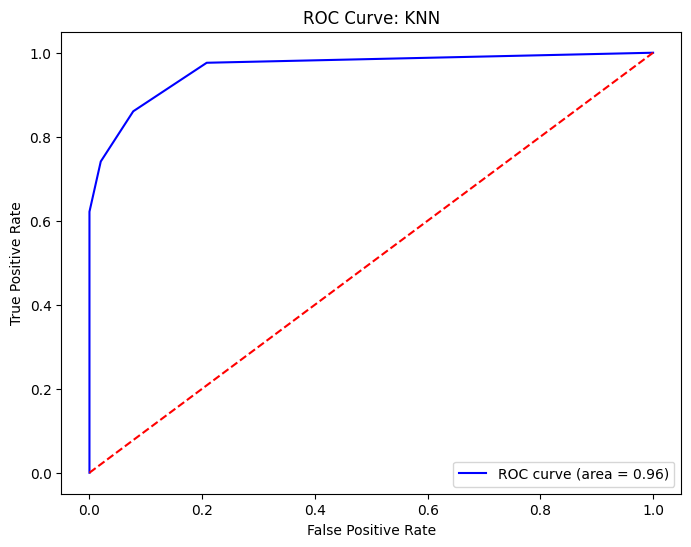

In [27]:
knn_probs = knn_model.predict_proba(X_test)[:, 1] 
fpr, tpr, _ = roc_curve(y_test, knn_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: KNN')
plt.legend()
plt.show()


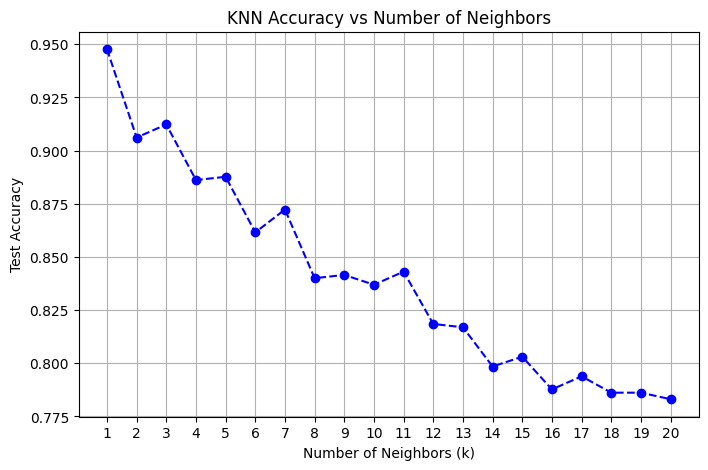

In [28]:
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred_k))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.xticks(k_values)
plt.grid()
plt.show()


NN MODEL

In [ ]:
class ImprovedFeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size=128):
        super(ImprovedFeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 1)
        self.dropout = nn.Dropout(0.5)
        self.batch_norm1 = nn.BatchNorm1d(hidden_size)
        self.batch_norm2 = nn.BatchNorm1d(hidden_size)
        self.batch_norm3 = nn.BatchNorm1d(hidden_size)

    def forward(self, x):
        x = torch.relu(self.batch_norm1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.batch_norm2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.batch_norm3(self.fc3(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

input_size = X_train.shape[1]
model = ImprovedFeedforwardNN(input_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5, verbose=True)

epochs = 20
best_val_loss = float('inf')
best_model_weights = model.state_dict().copy() 
early_stopping_patience = 10
no_improve_count = 0

start_time = time.time()
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_loss:.4f}")

for epoch in range(epochs):
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor).item()
        val_losses.append(val_loss)

    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_weights = model.state_dict().copy()
        no_improve_count = 0
    else:
        no_improve_count += 1

    # Early stopping
    if no_improve_count >= early_stopping_patience:
        print(f"Early stopping triggered at epoch {epoch+1}")
        break

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds.")

torch.save(best_model_weights, "a0_part_2_pgnanase.pt")
print("Model weights saved as 'a0_part_2_pgnanase.pt'.")

# Load model weights (if needed later)
model.load_state_dict(torch.load("a0_part_2_pgnanase.pt"))
print("Model weights loaded successfully.")

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs > 0.5).float()
    test_accuracy = accuracy_score(y_test_tensor.numpy(), test_predictions.numpy())  # Fix conversion
    test_loss = criterion(test_outputs, y_test_tensor)

print(f"Neural Network - Test Accuracy: {test_accuracy:.4f}")
print(f"Neural Network - Test Loss: {test_loss.item():.4f}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/20, Training Loss: 0.6812
Epoch 2/20, Training Loss: 0.5628
Epoch 3/20, Training Loss: 0.3872
Epoch 4/20, Training Loss: 0.3143
Epoch 5/20, Training Loss: 0.2321
Epoch 6/20, Training Loss: 0.1705
Epoch 7/20, Training Loss: 0.1268
Epoch 8/20, Training Loss: 0.1061
Epoch 9/20, Training Loss: 0.0919
Epoch 10/20, Training Loss: 0.0969
Epoch 11/20, Training Loss: 0.0811
Epoch 12/20, Training Loss: 0.0724
Epoch 13/20, Training Loss: 0.0677
Epoch 14/20, Training Loss: 0.0613
Epoch 15/20, Training Loss: 0.0681
Epoch 16/20, Training Loss: 0.0779
Epoch 17/20, Training Loss: 0.0627
Epoch 18/20, Training Loss: 0.0620
Epoch 19/20, Training Loss: 0.0504
Epoch 20/20, Training Loss: 0.0603
Epoch 1/20, Validation Loss: 0.2366
Epoch 2/20, Validation Loss: 0.2366
Epoch 3/20, Validation Loss: 0.2366
Epoch 4/20, Validation Loss: 0.2366
Epoch 5/20, Validation Loss: 0.2366
Epoch 6/20, Validation Loss: 0.2366
Epoch 7/20, Validation Loss: 0.2366
Epoch 8/20, Validation Loss: 0.2366
Epoch 9/20, Validatio

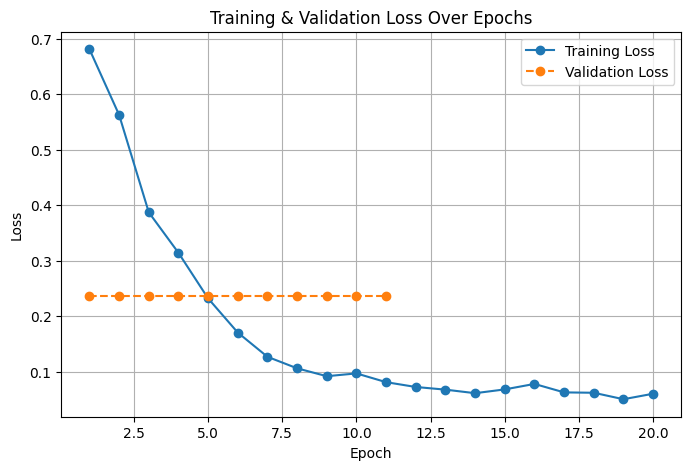

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

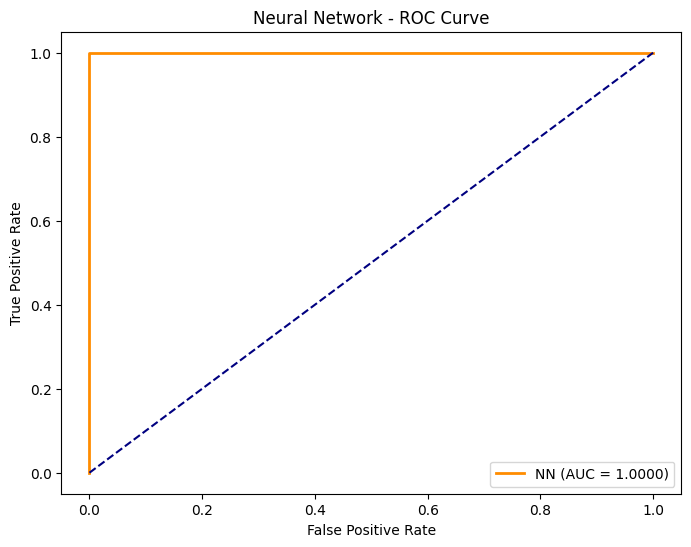

In [36]:
with torch.no_grad():
    nn_test_proba = model(X_test_tensor).numpy()

fpr, tpr, _ = roc_curve(y_test_tensor.numpy(), nn_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"NN (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Neural Network - ROC Curve")
plt.legend(loc="lower right")
plt.show()


<Figure size 600x500 with 0 Axes>

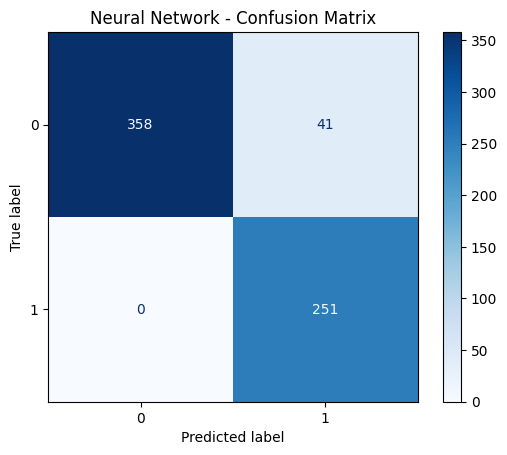

In [37]:
nn_test_pred = (nn_test_proba > 0.5).astype(int)

cm = confusion_matrix(y_test_tensor.numpy(), nn_test_pred)

plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Neural Network - Confusion Matrix")
plt.show()